<a href="https://colab.research.google.com/github/luis8choa/Computer_Vision/blob/main/Shallow_DeepIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clasificacion en Keras de Iris Dataset** ##


### **Importar las librerias**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

##**Leer los datos**

In [ ]:
data = pd.read_csv('iris.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
data2 = data
data2['species'][data2['species'] == 'setosa'] = 0
data2['species'][data2['species'] == 'versicolor'] = 1
data2['species'][data2['species'] == 'virginica'] = 2

data2.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


##**Dividir los datos en entrenamiento y validación**

In [ ]:
train_data = data2.drop(['species'], axis=1).values;
target_data = data2['species'].values;

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.30, random_state=42, shuffle = True)


print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


##**One Hot Encoding**

In [ ]:
# one hot encode outputs

y_train2 = np_utils.to_categorical(y_train)
y_test2 = np_utils.to_categorical(y_test)

print(y_train2.shape)
print(y_test2.shape)

print(y_train2)

(105, 3)
(45, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]

###**Visualizar el Dataset**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd03f129d0>,
      dtype=object)

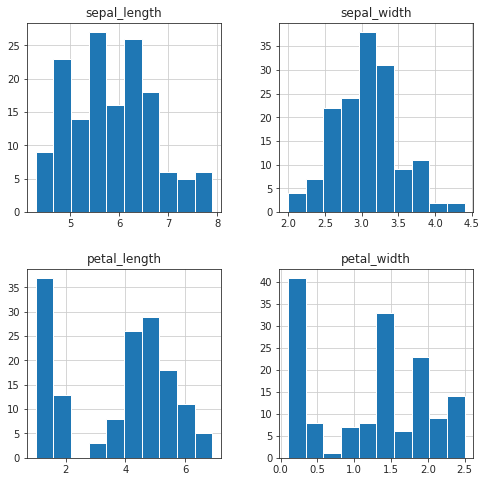

In [ ]:
data.hist(figsize=(8,8))

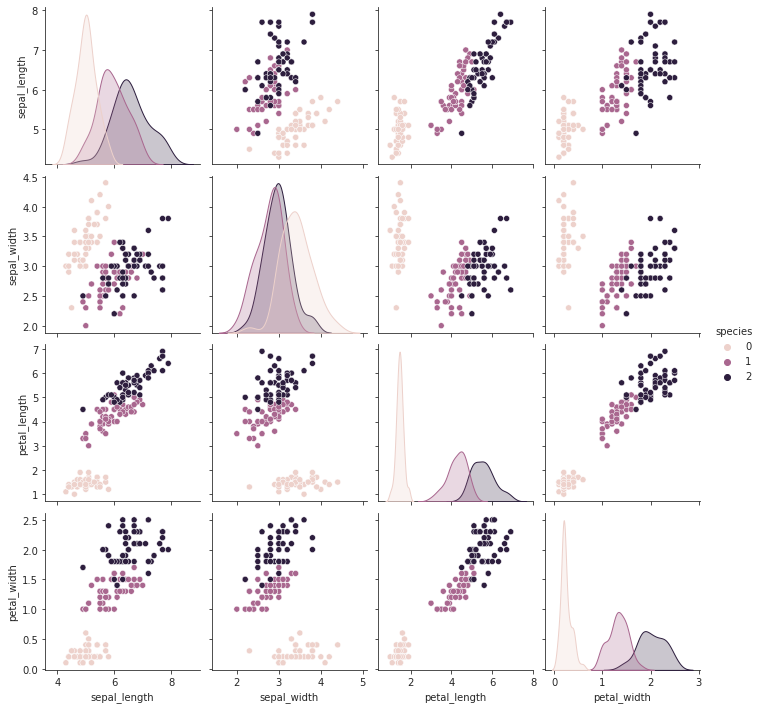

In [ ]:
import seaborn as sn

sn.pairplot(data, hue="species")

plt.show()

###**Crear la red Neuronal**

In [ ]:
def Sequential_model():
  model = Sequential()
  model.add(Dense(10, input_shape=(4,), activation='tanh'))
  model.add(Dense(3, activation='softmax'))

  model.summary()

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model


###**Entrenar la red Neuronal**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


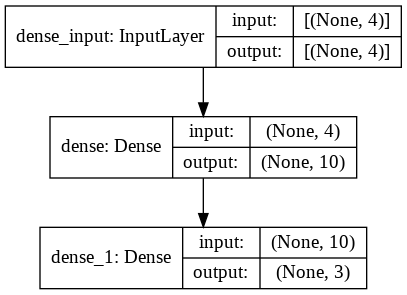

In [ ]:
model = Sequential_model();
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train, y_train2, validation_data=(x_test, y_test2), epochs=1000, verbose=0)

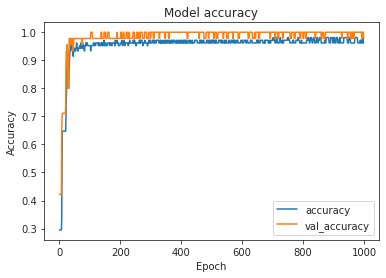

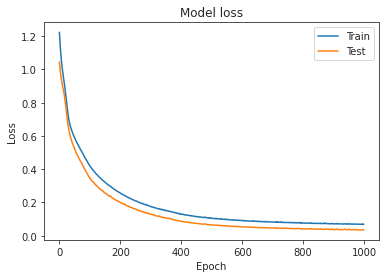

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

###**Resultado**

In [ ]:
Score = model.evaluate(x_test, y_test2, verbose=0)[1]
print(Score)

outputTest=model.predict(x_test)
print(outputTest)

outputTest = np.argmax(outputTest,axis=1)
print(outputTest)


0.9777777791023254
[[1.1470682e-03 9.8876965e-01 1.0083185e-02]
 [9.9795306e-01 2.0465686e-03 3.1373514e-07]
 [4.5545221e-07 2.2807061e-04 9.9977154e-01]
 [1.3628985e-03 9.4807851e-01 5.0558642e-02]
 [1.3120918e-03 9.7949421e-01 1.9193679e-02]
 [9.9736744e-01 2.6320934e-03 4.1736430e-07]
 [3.0605185e-03 9.9638617e-01 5.5324513e-04]
 [3.8451344e-05 1.8469857e-02 9.8149168e-01]
 [8.4753212e-04 4.8872223e-01 5.1043022e-01]
 [1.9544736e-03 9.9693704e-01 1.1084173e-03]
 [1.9209430e-04 1.1854181e-01 8.8126612e-01]
 [9.9742907e-01 2.5705467e-03 4.1395595e-07]
 [9.9816316e-01 1.8365902e-03 2.8667233e-07]
 [9.9742883e-01 2.5707460e-03 4.0838779e-07]
 [9.9812442e-01 1.8753494e-03 2.9489559e-07]
 [1.3540775e-03 9.7490418e-01 2.3741739e-02]
 [2.7489755e-06 1.5402116e-03 9.9845707e-01]
 [1.7327002e-03 9.9660623e-01 1.6611639e-03]
 [1.2333859e-03 9.7284263e-01 2.5924031e-02]
 [2.5029317e-06 1.3397778e-03 9.9865770e-01]
 [9.9695671e-01 3.0428390e-03 4.8321840e-07]
 [3.6357425e-04 2.4123983e-01 7.5839

##**Matriz de Confusion**

In [ ]:
from sklearn.metrics import confusion_matrix

mtx = confusion_matrix(y_test2.argmax(axis=1),outputTest)
print(mtx)

print('Setosa: ', str((mtx[0,0] / np.sum(mtx[0,:])*100)),'%')
print('Versicolor: ', str((mtx[1,1] / np.sum(mtx[1,:])*100)),'%')
print('Virginica: ', str((mtx[2,2] / np.sum(mtx[2,:])*100)),'%')

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Setosa:  100.0 %
Versicolor:  92.3076923076923 %
Virginica:  100.0 %


In [ ]:
  def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):

      import itertools

      classes = ['Setosa', 'Versicolor', 'Virginica']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

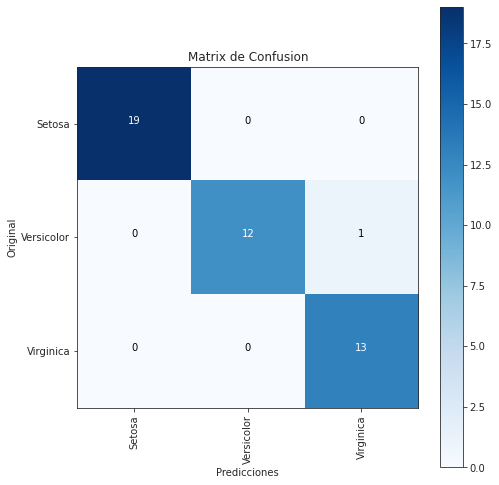

In [ ]:
num_classes = 3
plot_confusion_matrix(mtx, num_classes)